# Loan Default Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
df=pd.read_csv("data\\Loan_default.csv")

## Data Exploration & Cleaning

In [3]:
data_types = df.dtypes
categories = ['Numeric' if dtype in ['int64', 'float64'] else 'Categorical' for dtype in data_types]
type_counts = pd.Series(categories).value_counts()


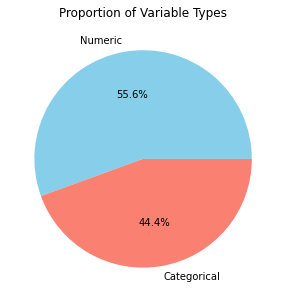

In [4]:
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Proportion of Variable Types")
plt.show()


In [40]:
df.shape

(255347, 18)

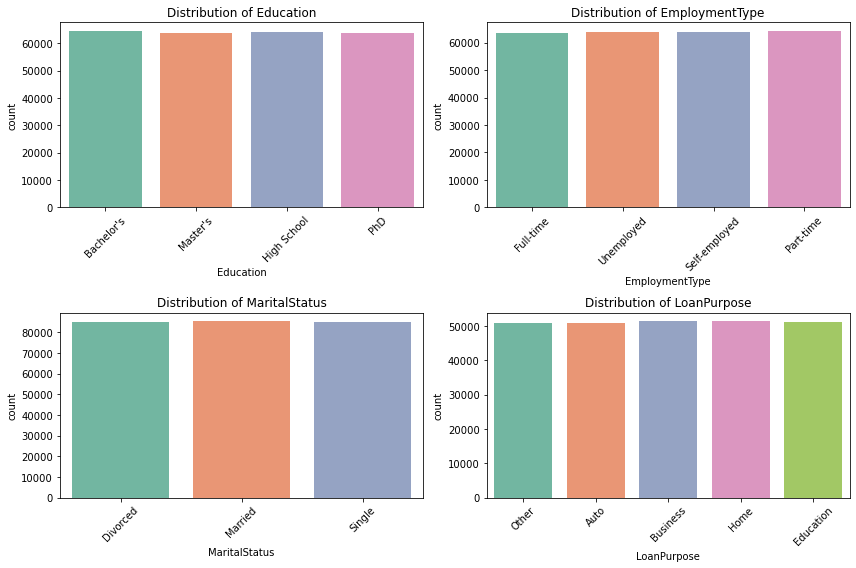

In [41]:
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


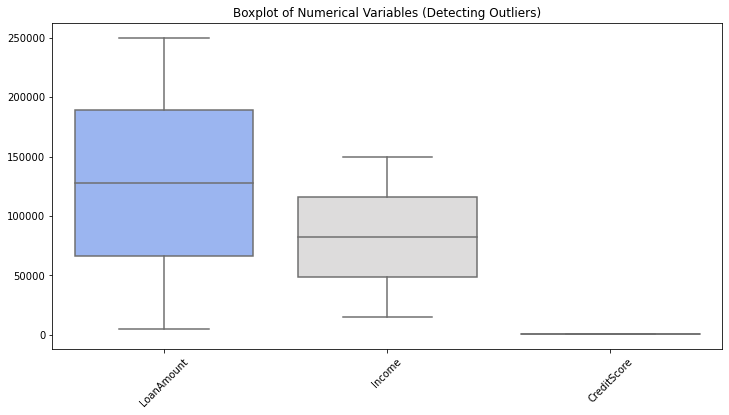

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LoanAmount', 'Income', 'CreditScore']], palette="coolwarm")
plt.title("Boxplot of Numerical Variables (Detecting Outliers)")
plt.xticks(rotation=45)
plt.show()


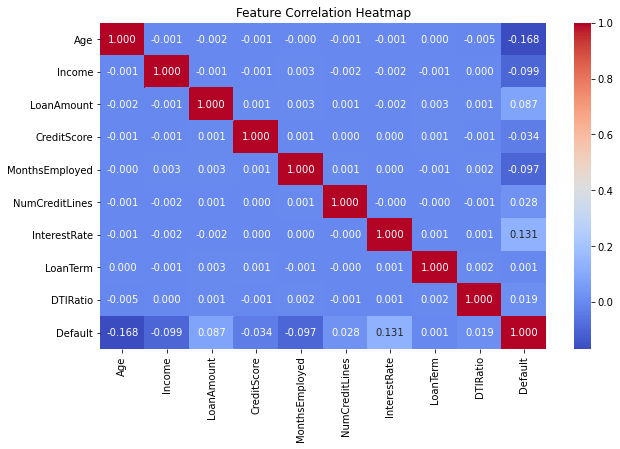

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Feature Correlation Heatmap")
plt.show()



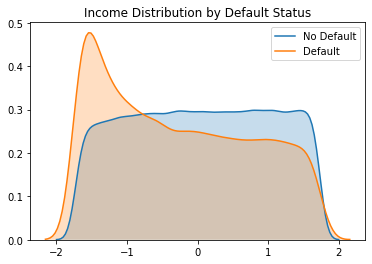

In [16]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df["Default"] == 0]["Income"], label="No Default", shade=True)
sns.kdeplot(df[df["Default"] == 1]["Income"], label="Default", shade=True)
plt.title("Income Distribution by Default Status")
plt.legend()
plt.show()


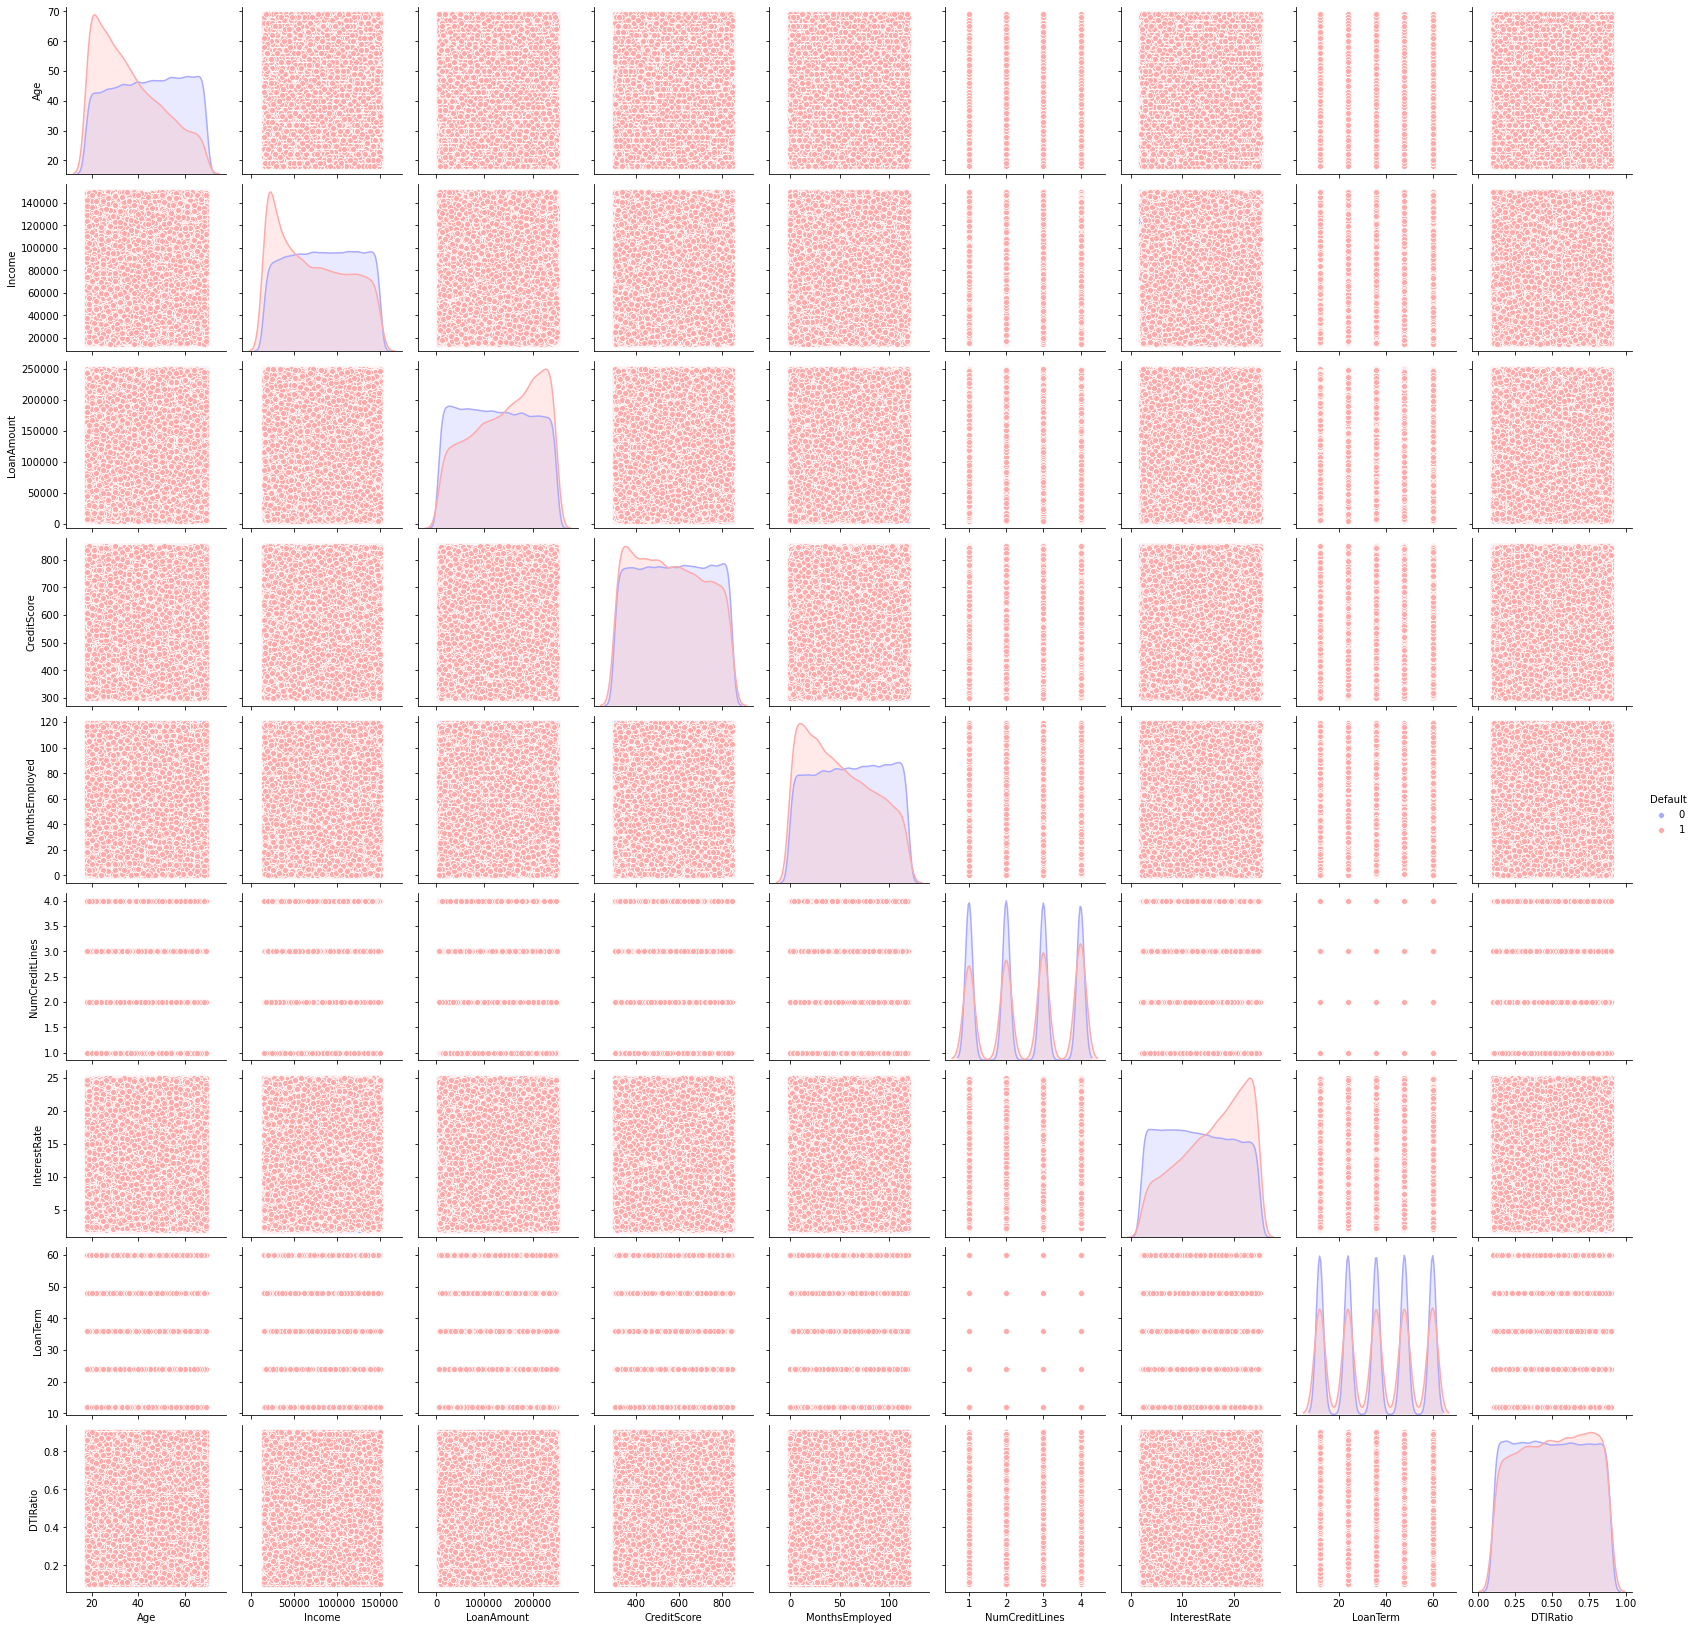

In [51]:
sns.pairplot(df,hue='Default',palette='bwr')

In [23]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [17]:

# Binary Categorical Columns - Use Label Encoding
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
label_enc = LabelEncoder()

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

# Multi-category Columns - Use One-Hot Encoding
multi_cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)  

print(df.head()) 

       LoanID       Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  HPSK72WA7R  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  C1OZ6DPJ8Y  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3  V2KKSFM3UN -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  EY08JDHTZP  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  Education_PhD  \
0        1.341937      0.261771 -0.001526 -0.260753  ...              0   
1       -1.343791     -1.308350  1.412793  0.778585  ...              0   
2        0.446694      1.156831 -0.708685 -0.823728  ...              0   
3        0.446694     -0.967805 -0.708685 -1.170174  ...              0   
4        1.341937     -1.052188  0.705634  0.995114  ...              0   

   EmploymentType_Part-time  EmploymentType_Self-employed  \
0                  

In [33]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,0,0,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,0,1,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,0,0,1,0,0,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0,0,1,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,0,1,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LoanID                        255347 non-null  object 
 1   Age                           255347 non-null  float64
 2   Income                        255347 non-null  float64
 3   LoanAmount                    255347 non-null  float64
 4   CreditScore                   255347 non-null  float64
 5   MonthsEmployed                255347 non-null  float64
 6   NumCreditLines                255347 non-null  float64
 7   InterestRate                  255347 non-null  float64
 8   LoanTerm                      255347 non-null  float64
 9   DTIRatio                      255347 non-null  float64
 10  HasMortgage                   255347 non-null  int32  
 11  HasDependents                 255347 non-null  int32  
 12  HasCoSigner                   255347 non-nul

## Modeling

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

*first we are bringing all the numeric variable to similar scale*

In [20]:
numerical_features = [
    'LoanAmount', 
    'Income', 
    'CreditScore',
    'MonthsEmployed', 
    'NumCreditLines', 
    'InterestRate', 
    'LoanTerm', 
    'DTIRatio',
    'Age'
]


scaler = StandardScaler()


df[numerical_features] = scaler.fit_transform(df[numerical_features])


df[numerical_features].head()



,LoanAmount,Income,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Age
0,-1.086833,0.089693,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0.833990
1,-0.044309,-0.823021,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,1.701221
2,0.022715,0.043854,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,0.166888
3,-1.168538,-1.303452,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,-0.767053
4,-1.671921,-1.592855,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,1.100830


*Data partition*

In [21]:
X = df.drop(["Default","LoanID"], axis=1)
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [13]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,2.553470e+05,255347.000000
mean,1.897501e-16,3.170401e-17,4.939996e-17,2.073817e-17,3.247907e-16,2.387579e-16,2.200559e-17,2.009982e-16,-1.216836e-16,0.116128
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.320379
min,-1.700995e+00,-1.732398e+00,-1.730348e+00,-1.725980e+00,-1.718715e+00,-1.343791e+00,-1.731770e+00,-1.415845e+00,-1.733149e+00,0.000000
25%,-8.337635e-01,-8.642522e-01,-8.670578e-01,-8.638217e-01,-8.527470e-01,-4.485487e-01,-8.623271e-01,-7.086855e-01,-8.670336e-01,0.000000
50%,-3.324207e-02,-8.547763e-04,-3.227743e-04,-1.663564e-03,1.322113e-02,-4.485487e-01,-4.938420e-03,-1.525943e-03,-9.183609e-04,0.000000
75%,8.339895e-01,8.654300e-01,8.668216e-01,8.667877e-01,8.791892e-01,4.466940e-01,8.675186e-01,7.056336e-01,8.651968e-01,0.000000
max,1.701221e+00,1.732408e+00,1.728108e+00,1.728946e+00,1.716292e+00,1.341937e+00,1.733948e+00,1.412793e+00,1.731312e+00,1.000000


In [22]:
df.dtypes

LoanID                           object
Age                             float64
Income                          float64
LoanAmount                      float64
CreditScore                     float64
MonthsEmployed                  float64
NumCreditLines                  float64
InterestRate                    float64
LoanTerm                        float64
DTIRatio                        float64
HasMortgage                       int32
HasDependents                     int32
HasCoSigner                       int32
Default                           int64
Education_High School             uint8
Education_Master's                uint8
Education_PhD                     uint8
EmploymentType_Part-time          uint8
EmploymentType_Self-employed      uint8
EmploymentType_Unemployed         uint8
MaritalStatus_Married             uint8
MaritalStatus_Single              uint8
LoanPurpose_Business              uint8
LoanPurpose_Education             uint8
LoanPurpose_Home                  uint8


In [23]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Accuracy: 0.885823379674956
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [24]:
print("\n--- Decision Tree ---")
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



--- Decision Tree ---
Accuracy: 0.8852946935578617
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.55      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



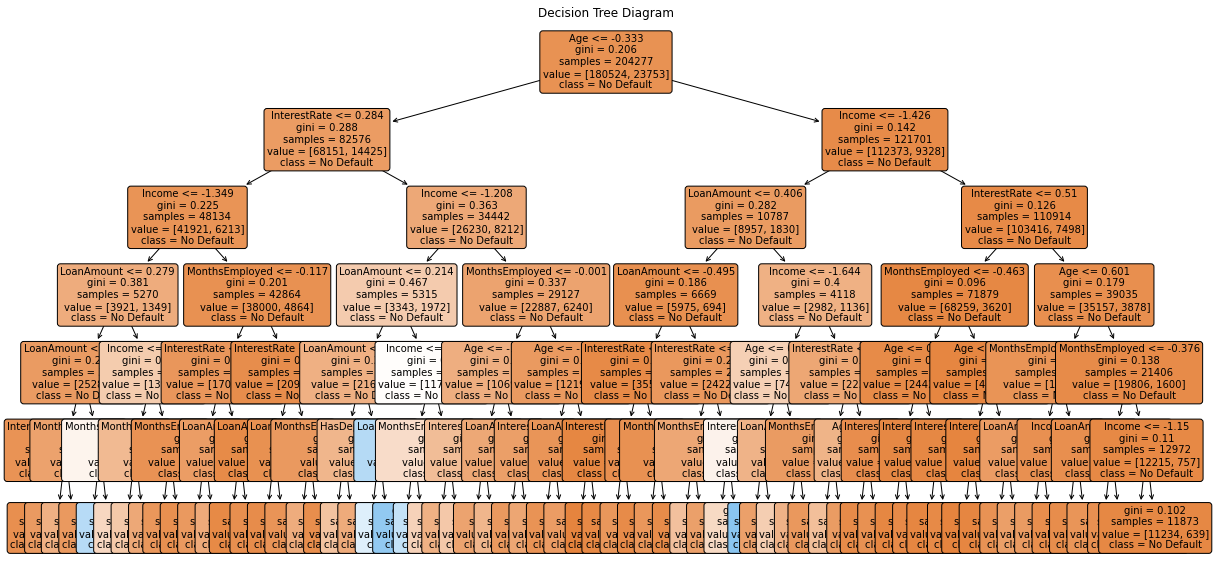

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt, 
    feature_names=X.columns,         
    class_names=["No Default", "Default"],  
    filled=True,                     
    rounded=True,                    
    fontsize=10
)
plt.title("Decision Tree Diagram")
plt.show()


In [26]:
print("\n--- Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



--- Random Forest ---
Accuracy: 0.8865087135304484
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



Random Forest Feature Importances:
Income                          0.125919
InterestRate                    0.119457
LoanAmount                      0.113162
Age                             0.103265
CreditScore                     0.099601
MonthsEmployed                  0.097295
DTIRatio                        0.087892
LoanTerm                        0.040589
NumCreditLines                  0.032297
HasMortgage                     0.014715
MaritalStatus_Single            0.014072
HasDependents                   0.012490
LoanPurpose_Business            0.012170
LoanPurpose_Education           0.012150
Education_High School           0.012119
LoanPurpose_Other               0.011927
Education_Master's              0.011873
Education_PhD                   0.011830
EmploymentType_Self-employed    0.011804
EmploymentType_Part-time        0.011793
HasCoSigner                     0.011724
MaritalStatus_Married           0.011673
EmploymentType_Unemployed       0.010096
LoanPurpose_Home      

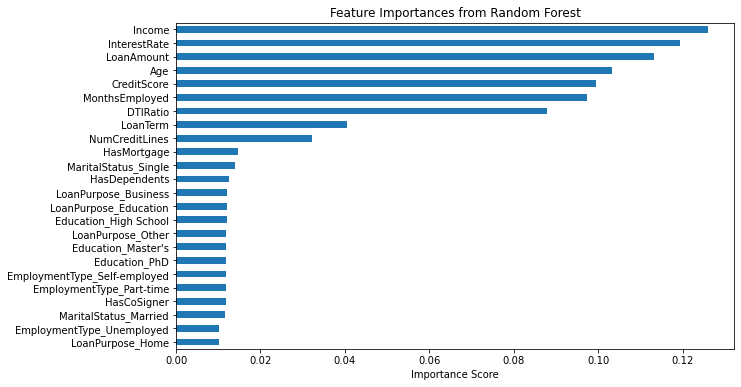

In [27]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Random Forest Feature Importances:")
print(importances.sort_values(ascending=False))

# Visualize feature importances
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X.columns)
print("Permutation Importances:")
print(perm_importances.sort_values(ascending=False))


Permutation Importances:
Income                          3.330723e-03
LoanAmount                      2.010965e-03
Age                             1.593891e-03
InterestRate                    1.151361e-03
MonthsEmployed                  9.398864e-04
EmploymentType_Unemployed       4.542784e-04
HasDependents                   3.211279e-04
CreditScore                     2.760916e-04
Education_High School           1.958097e-04
HasCoSigner                     1.781868e-04
MaritalStatus_Married           1.409830e-04
LoanPurpose_Other               1.390249e-04
MaritalStatus_Single            1.116115e-04
LoanPurpose_Business            7.832387e-05
LoanPurpose_Home                7.049148e-05
LoanPurpose_Education           6.461719e-05
EmploymentType_Self-employed    5.482671e-05
Education_Master's              3.720384e-05
DTIRatio                        2.741335e-05
HasMortgage                     1.566477e-05
NumCreditLines                  3.916193e-06
EmploymentType_Part-time      

In [29]:
print("\n--- KNN Classifier ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



--- KNN Classifier ---
Accuracy: 0.8752692383003721
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.33      0.08      0.13      5900

    accuracy                           0.88     51070
   macro avg       0.61      0.53      0.53     51070
weighted avg       0.83      0.88      0.84     51070



In [30]:
print("\n--- Gradient Boosting Classifier ---")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



--- Gradient Boosting Classifier ---
Accuracy: 0.8871744664186411
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [32]:
print("\n--- AdaBoost Classifier ---")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))



--- AdaBoost Classifier ---
Accuracy: 0.8869199138437439
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.06      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



### Summary of all the model 

In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (y_true) and predictions (y_pred_model) for each model
models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "k-NN": y_pred_knn,
    "Gradient Boost": y_pred_gb,
    "AdaBoost": y_pred_ada
}

# Collect performance metrics
metrics = []
for model, y_pred in models.items():
    metrics.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

# Create a DataFrame
df_metrics = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"], index=models.keys())
print(df_metrics)


                Accuracy  Precision    Recall  F1-Score
Decision Tree   0.885295   0.550481  0.038814  0.072514
Random Forest   0.886509   0.685714  0.032542  0.062136
k-NN            0.875269   0.330202  0.077458  0.125481
Gradient Boost  0.887174   0.648707  0.051017  0.094595
AdaBoost        0.886920   0.614679  0.056780  0.103957


**Interpretation**:The table presents the performance metrics of five different classification models: Decision Tree, Random Forest, k-NN, Gradient Boost, and AdaBoost. The results indicate that all models exhibit high accuracy (~88%), but their precision, recall, and F1-score are relatively low. This suggests that while the models are good at predicting the majority class (likely non-default cases), they struggle to correctly identify defaulters. Among the models, Random Forest and Gradient Boosting have the highest precision

### AUC and ROC

In [52]:
import pandas as pd

# Initialize a results dictionary
results = {"Model": [], "ROC AUC": [], "PR AUC": []}

# Compute metrics for each classifier
for name, model in classifiers.items():
    y_probs = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    
    # Store AUC values
    results["Model"].append(name)
    results["ROC AUC"].append(auc(fpr, tpr))
    results["PR AUC"].append(auc(recall, precision))

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by ROC AUC
df_results = df_results.sort_values(by="ROC AUC", ascending=False)

print(df_results)

            Model   ROC AUC    PR AUC
3  Gradient Boost  0.757516  0.326725
4        AdaBoost  0.755455  0.319581
1   Random Forest  0.731358  0.303582
0   Decision Tree  0.722199  0.275101
2            k-NN  0.622258  0.209890


**Interpretation**: Here we have presented the performance of different models based on ROC AUC (Receiver Operating Characteristic Area Under the Curve) and PR AUC (Precision-Recall Area Under the Curve), which measure overall classification performance and ability to handle class imbalance, respectively. 

Among the models, Gradient Boosting (ROC AUC: 0.76, PR AUC: 0.33) and AdaBoost (ROC AUC: 0.76, PR AUC: 0.32) perform the best, indicating strong classification ability. Random Forest (ROC AUC: 0.73, PR AUC: 0.30) and Decision Tree (ROC AUC: 0.72, PR AUC: 0.28) follow closely but show slightly weaker performance. k-NN (ROC AUC: 0.62, PR AUC: 0.21) has the lowest scores, suggesting it is the least effective in this scenario. Given these results, ensemble methods like Gradient Boost and AdaBoost appear to be the most promising for this classification task.

### Graphical plot of ROC and AUC

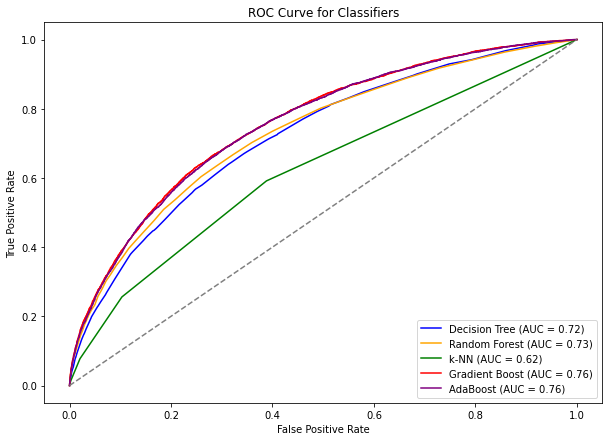

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Define classifier models
classifiers = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "k-NN": knn,
    "Gradient Boost": gb,
    "AdaBoost": ada
}

# Colors for plots
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Initialize plots
plt.figure(figsize=(10, 7))

# Loop through classifiers and compute ROC curves
for (name, model), color in zip(classifiers.items(), colors):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_probs)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, color=color, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Final ROC plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Classifiers")
plt.legend(loc="lower right")
plt.show()

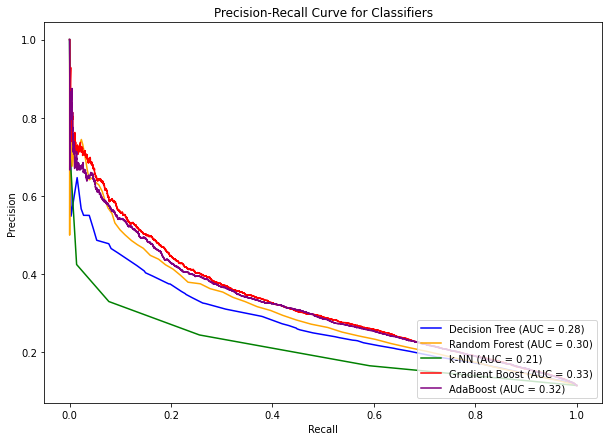

In [37]:

plt.figure(figsize=(10, 7))
for (name, model), color in zip(classifiers.items(), colors):
    y_probs = model.predict_proba(X_test)[:, 1]  
    precision, recall, _ = precision_recall_curve(y_test, y_probs)  # Compute Precision-Recall curve
    pr_auc = auc(recall, precision)  # Compute PR AUC
    plt.plot(recall, precision, color=color, label=f"{name} (AUC = {pr_auc:.2f})")

# Final PR plot settings
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Classifiers")
plt.legend(loc="lower right")
plt.show()

### Calibration Curve

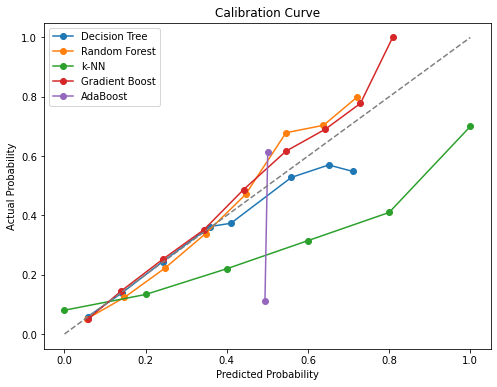

In [47]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for name, model in classifiers.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)
    plt.plot(prob_pred, prob_true, marker="o", label=name)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


**interpretetion**: The calibration curve evaluates how well the predicted probabilities from different classifiers align with actual probabilities. Ideally, a well-calibrated model should follow the diagonal line, indicating perfect probability estimation. In this plot, Gradient Boosting and Random Forest perform well, staying close to the diagonal with minor deviations, making them reliable choices for probability predictions. Decision Tree slightly underestimates probabilities, indicating some overconfidence in predictions. k-NN, however, is significantly miscalibrated, underestimating probabilities across different ranges, making it a poor choice for well-calibrated outputs. AdaBoost shows instability with a large jump in the middle, suggesting high variance or overfitting. Overall, Gradient Boosting and Random Forest appear to be the best-calibrated models, while k-NN and AdaBoost may need further calibration techniques like Platt Scaling or Isotonic Regression to improve their reliability.

### Cohen's Kappa Score

In [48]:
from sklearn.metrics import cohen_kappa_score

for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"{name}: Cohen's Kappa Score = {kappa:.3f}")


Decision Tree: Cohen's Kappa Score = 0.058
Random Forest: Cohen's Kappa Score = 0.052
k-NN: Cohen's Kappa Score = 0.085
Gradient Boost: Cohen's Kappa Score = 0.079
AdaBoost: Cohen's Kappa Score = 0.086


**interpretation**: The Cohen's Kappa scores represent the agreement between the model predictions and actual labels beyond random chance. AdaBoost (0.086) and k-NN (0.085) show the highest agreement, followed by Gradient Boost (0.079), while Decision Tree (0.058) and Random Forest (0.052) have the lowest scores. Since all values are below 0.1, the models exhibit weak predictive performance and may require further optimization.

### Confusion Matrix

<Figure size 360x288 with 0 Axes>

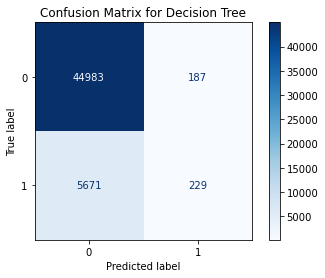

<Figure size 360x288 with 0 Axes>

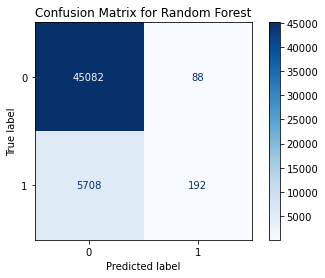

<Figure size 360x288 with 0 Axes>

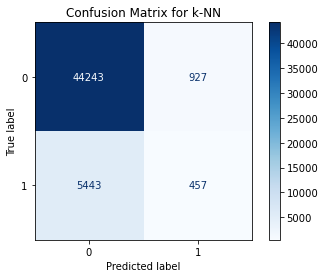

<Figure size 360x288 with 0 Axes>

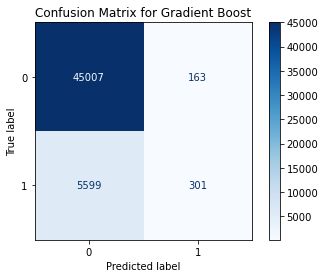

<Figure size 360x288 with 0 Axes>

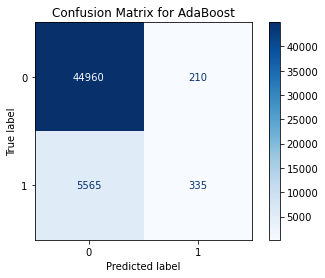

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    ConfusionMatrixDisplay(cm).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


### K-Means Clustering


--- K-Means Clustering ---


C:\Users\Pradipta saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pradipta saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pradipta saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pradipta saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pradipta saha\a

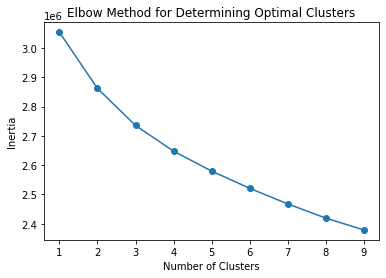

In [51]:
print("\n--- K-Means Clustering ---")

inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal Clusters")
plt.show()



**Interpretation** : The elbow plot from the K-Means clustering analysis helps determine the optimal number of clusters by examining the inertia (sum of squared distances from cluster centroids). The graph shows a steady decline in inertia as the number of clusters increases, but there is no clear "elbow" point where the rate of decrease sharply changes. This suggests that defining a distinct number of clusters may not significantly improve segmentation.

In [54]:
# Let's assume the Elbow suggests 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

print("\nCluster Counts:")
print(df['Cluster'].value_counts())


cluster_default_rate = df.groupby('Cluster')['Default'].mean()
print("\nDefault Rate by Cluster:")
print(cluster_default_rate)

C:\Users\Pradipta saha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Counts:
2    89446
0    89175
1    76726
Name: Cluster, dtype: int64

Default Rate by Cluster:
Cluster
0    0.113810
1    0.108334
2    0.125126
Name: Default, dtype: float64



Upon analyzing the resulting clusters, we observed that the default rates across the three clusters were quite similar (Cluster 0: 11.48%, Cluster 1: 10.83%, Cluster 2: 12.51%). Since there is no significant distinction in default behavior between clusters, the segmentation does not provide meaningful insights for further analysis. As a result, we decided not to use clustering as a basis for model development.

## Conclussion

Based on our evaluation using ROC AUC, accuracy, precision, recall, and F1-score, the models achieve high overall accuracy (around 88%), but their precision, recall, and F1-scores remain suboptimal. This suggests that while the models reliably predict the majority class (non-defaulters), they struggle to correctly identify defaulters. Although the high ROC AUC values indicate that the models have reasonable discriminative power, the low recall and F1-scores reveal that the detection of the minority class (defaulters) is inadequate. Therefore, further optimization—such as applying rebalancing techniques, fine-tuning model parameters, or improving calibration—is necessary to enhance the detection of loan defaulters.

## END